#  !!!!!!!!!!!!!!! Performing Perceptron on IRIS dataset !!!!!!!!!!!!!!!

In [2]:
# We are performing Perceptron algorithm on our IRIS dataset. Download it from the github data .


# The mathematical calculations happening under the hood has been explained both in coding and 
# by proper mathematical explainations which has been attached in the document . 
# The code has been explained at the end of the document


In [3]:
# For the mathematics that has been explained following data has been used 
# Only first five samples have been taken into consideration

# Uncomment the below lines and work on it

#Comment the next line where 100 samples have been taken

# ------------------------------------------------------------------------------------------------------------
# import numpy as np
# import pandas as pd
# df=pd.read_csv('C:\\Users\\J.A.R.V.I.S\\Desktop\\IRIS.csv',header=None)
# y=df.iloc[0:5,4].values
# y=np.where(y=='Iris-setosa',-1,1)
# X=df.iloc[0:5,[0,2]].values

In [4]:
import pandas as pd
import numpy as np
my_col=['Sepal.Length', 'Sepal.Width', 'Petal.Length' ,'Petal.Width', 'Species']
df=pd.read_csv('C:\\Users\\J.A.R.V.I.S\\Desktop\\IRIS.csv',header=None)
y=df.iloc[0:100,4].values

y=np.where(y=='Iris-setosa',-1,1)#Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50
# Iris-Versicolor flowers, respectively respectively, and convert the class labels into the two integer
# class labels 1 (Versicolor) and -1 (Setosa) that we assign to a vector y where the values.
type(y)
y


X=df.iloc[0:100,[0,2]].values
# Similarly, we extract the first feature column (sepal length) and the third feature
# column (petal length) of those 100 training samples and assign them to a feature
# matrix X,

# X

In [5]:
import numpy as np
class Perceptron:
    def __init__(self,eta,n_iter):
        '''
        Parameter:
        
        eta=learning rate between 0.0 and 1.0
        n_iter=No. of epoch that it passes over the training dataset
        
        Attributes
        ----------
        w_ = Its the weights after fitting , initialized with 0 or very small numbers close to 0
        errors_ = Number of missclassification after each epoch
        
        
        For better understanding I have commented and printed wherever neccesary
        '''
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self,X,y):
        '''fit Function is to fit Training data 
        X :- is an array and has the features . Its dimensions are [n_samples,n_features]
        y :- is an array and has the labels or the target variable . Its dimensions are [n_samples]
        
        
        '''
        
        self.w_ = np.zeros(1 + X.shape[1]) # w_ contains both weights and bias . As we know know number of weights is the same as n
        # of features and that is denoted by X.shape[1] . The 1 is added to denote the bias.
        
        self.errors_ = [] #errors_ will collect all the error terms . Here errors_ and errors are two different stuff.
        #errors_ collects the errors 
        
        errors = 0 
        
        Epoch = 0 #No. of Epoch (Initializing Epoch)
        counter = 0 # No. of iterations (Initializing counter)
        
        for _ in range(self.n_iter):
            Epoch = Epoch + 1
            counter=0
            print("Iteration no",Epoch)
            
            print("####### errors+=int(update != 0.0) ################## ")
            print(errors)
            errors = 0
            for xi, target in zip(X, y):
                counter=counter+1
                print("counter is  ",counter)
                print()
                print("############### Learning Rate= Eta ##################  ")
                print(self.eta)
                update = self.eta * (target - self.predict(xi))
                
                print("########### Target, predict ##################  ")
                print(target,self.predict(xi))
                
                print("update is ")
                print(update)
                print("xi is ")
                print(xi)
                
                print("####### self.w_ ##################")
                print("########### self.w_[1:] += update * xi #############")
                print("self.w_[1:] +=",update,"*",xi) #Visualizing self.w_[1:] += update * xi (Visualizing how weights are updated)
                self.w_[1:] += update * xi # Actual weights being updated
                self.w_[0] += update # Actual bias  being updated
                
                print(self.w_)
                errors += int(update != 0.0)#  checking for sum of errors 
                print(errors)
                print( "\n \n ")
            self.errors_.append(errors)
        return self.errors_
    
    def net_input(self,X):
        """Calculate net input"""
        print("##### Dot product #####")
        print(X,".",self.w_[1:],"+",self.w_[0])
        return (np.dot(X,self.w_[1:]) +  self.w_[0])
        
    def predict(self,x):
        """Return class label after unit step"""
        #check for np.where documentation 
        return np.where(self.net_input(x) >= 0.0 , 1,-1) 

In [6]:
ppn=Perceptron(0.1,10)
ppn.fit(X,y)

('Iteration no', 1)
####### errors+=int(update != 0.0) ################## 
0
('counter is  ', 1)
()
############### Learning Rate= Eta ##################  
0.1
##### Dot product #####
(array([ 5.1,  1.4]), '.', array([ 0.,  0.]), '+', 0.0)
########### Target, predict ##################  
##### Dot product #####
(array([ 5.1,  1.4]), '.', array([ 0.,  0.]), '+', 0.0)
(-1, array(1))
update is 
-0.2
xi is 
[ 5.1  1.4]
####### self.w_ ##################
########### self.w_[1:] += update * xi #############
('self.w_[1:] +=', -0.2, '*', array([ 5.1,  1.4]))
[-0.2  -1.02 -0.28]
1

 
 
('counter is  ', 2)
()
############### Learning Rate= Eta ##################  
0.1
##### Dot product #####
(array([ 4.9,  1.4]), '.', array([-1.02, -0.28]), '+', -0.20000000000000001)
########### Target, predict ##################  
##### Dot product #####
(array([ 4.9,  1.4]), '.', array([-1.02, -0.28]), '+', -0.20000000000000001)
(-1, array(-1))
update is 
0.0
xi is 
[ 4.9  1.4]
####### self.w_ ###############

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

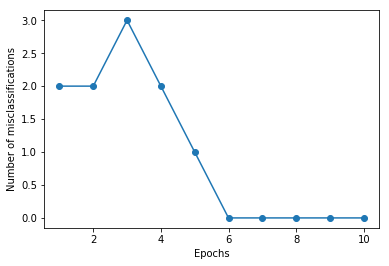

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()
# As we can see in the preceding plot, our perceptron already converged after the
# sixth epoch and should now be able to classify the training samples perfectly.

# How Code works

In [9]:
#Explaining the flow :-
# Starts from line no-
# An object of perceptron with parameters eta and n_iter is created and is saved in reference variable ppn
# Self in the perceptron code refers to the object ppn    
# The methods of perceptron is accessed using ppn.fit(X,y) and passing X,y .
# The "def __init__(self,eta,n_iter):" function is a constructor and is called automatically when the object ppn is created
# and the value of eta and n_iter is assigned to it.

# Then the controller comes back to ppn.fit(X,y) and  fit function is called .
# self.w_ contains the weights and bias . As we know know number of weights is the same as no of features and that is denoted by
# X.shape[1] . The 1 is added to include the bias term.
# The outer for loop is used to count the no of iterations or Epoch untill the missclassification errors are completely 0 .
# At this points the weights are no longer needed to be updated and even if we continue our Epochs the weights will no longer 
# be updated.
# To visualise this do the maths .

# The inner for loop passes over the whole dataset and each time it encounters a sample it updates the weights.
# The update is calculated using the formulae "update = self.eta * (target - self.predict(xi))" . Here target is the label
# and self.predict(xi) is the output which  gives a call to the predict function which in turns gives a call to the net_input 
# function where we do the calculation as mentioned below :-
# y=(w1*x1)+(w2*x2)+bias i.e the net_input function .
# This value is then returned back to predict function from where it was called and 
# then its compared with 0(Heaviside function performed) . If the net_input is >=0 then 1 is returned else -1. This 1 or -1 is our 
# predicted output.
# This value is then returned to "update = self.eta * (target - self.predict(xi))" in fit function. This update is then used to
# calculate the weights and biases.
# In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. 
# In this simple case n = 10 iterations are enough;
# for a bigger and possibly "noisier" set of input data much larger numbers should be used